In [85]:
#Import necessary librarys
from dotenv import load_dotenv
import os
import pandas as pd
load_dotenv()

#Connect with API SPOTIFY
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

#Into the SPOTIPY
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Select my artist
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id = client_id, client_secret=client_secret))
band = 'spotify:artist:1vBn5Puz4mdZopZEHq1QDq'
artist = sp.artist(band)

#Select your Top Tracks
top_tracks = sp.artist_top_tracks(band)
track_data = []
for track in top_tracks['tracks']:
    track_ = track['name']
    popularity = track['popularity']
    duration = track['duration_ms']/60000
    track_data.append({"Track": track_, "Popularity" : popularity, "Duration" : duration})

#Create a DataFrame       
the_moda = pd.DataFrame(track_data)

#Show top 3 songs by popularity
the_moda[:3]


,Track,Popularity,Duration
0,1932,64,3.014717
1,Héroes del Sábado,62,4.079450
2,PRMVR,60,3.050217


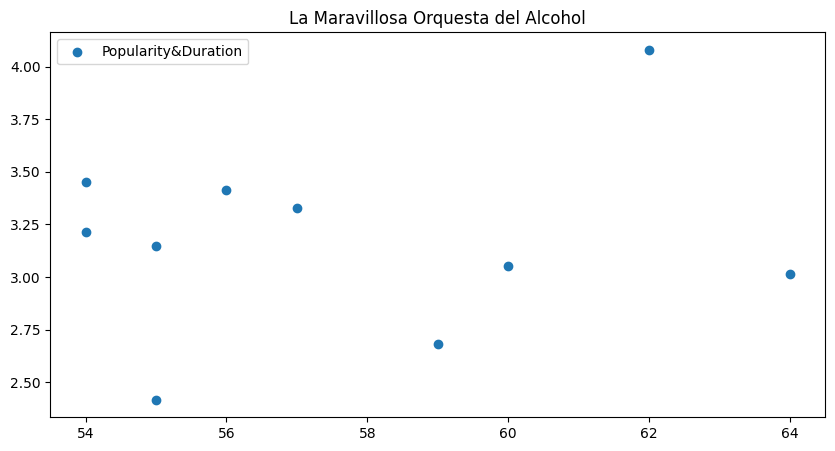

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))

plt.scatter(the_moda["Popularity"],the_moda["Duration"], label = "Popularity&Duration")

plt.title(artist['name'])
plt.legend()
plt.show()


After seeing the graph, we can see how in my case, popularity has no relationship with the duration of the M.O.D.A songs.